# Week 3 Tutorial - Python Modules 

In this week, we will cover the following topics:

* Python Modules
    * What is a Python module?
    * How to use a Python module?
* Biopython 



## Python Modules

### What is a Python module?

In Python, a module is a file containing Python code that can be imported and used in other Python code. A module can define functions, classes, and variables that can be used in other programs. Modules provide a way to organise code into separate files, making it easier to manage and reuse code across multiple programs. 

Python comes with a large number of built-in modules that provide a wide range of functionality, such as file I/O, networking, math operations, and more. You can also create your own modules by writing Python code in a file with a `.py` extension and importing it into your other Python programs. 

### How to use a Python module?

If we are using a built-in Python module, we can load the module by use the `import` command with the module name. If we are using an external Python module, we have to download the module first and then use `import` to load. 

A module can provide a range of functions and constants, we need to put the function name after the module name with a dot to call the function. 

Here's an example of importing a built-in module in Python:

In [15]:
import math

print("Pi is", math.pi)

x = math.sin(2*math.pi)
print("The sine value of 2*pi is", x)

y = math.sqrt(2) 
print("The square root value of 2 is", y)

Pi is 3.141592653589793
The sine value of 2*pi is -2.4492935982947064e-16
The square root value of 2 is 1.4142135623730951


In this example, we used the `import` command to load the "math" module. `math.pi` means to call the "pi" value that stored in the module "math".

Then we also used `math.sin` to calculate the sine value of `2*pi` and `math.sqrt` to calculate the square root of 2.

__We can also import specific functions or variables from a module.__

In this way, we can only use the function name to call the function, we don't need to put the module name before. 

Here's an example:

In [16]:
from math import sin, pi

print("Pi is", pi)

x = sin(2 * pi)
print("The sine value of 2*Pi is", x)

Pi is 3.141592653589793
The sine value of 2*pi is -2.4492935982947064e-16


__We can also give a module a different name.__

Some modules can have really long names and it can be difficult for us to type every time. So, it is easier if we make the module name short. 

Here's an example about how to do so:

In [18]:
import math as m

print("Pi is", m.pi)
print("The sine value of 2*Pi is", m.sin(2 * m.pi))

Pi is 3.141592653589793
The sine value of 2*Pi is -2.4492935982947064e-16


__We can also import a specific function or variable from a module and give it a different name.__

For example:

In [19]:
from math import sin as s 
from math import pi 

print("Pi is", pi)
print("The sine value of 2*Pi is", s(2*pi))

Pi is 3.141592653589793
The sine value of 2*Pi is -2.4492935982947064e-16


## following to be deleted ???

### Objectives

* Understand what python object is
* Understand what a module is
* Build your DNA/Protein sequencing object
* Apply biopython to the Arabidopsis genome
* Apply certain biopython functions on the Arabpidosis genome to learn something about biology

## It's all a bit like cats and dogs.

### Exercise I

* Imagine a dog
* Find a picutre of it on the internet
* Post it in slack


In [1]:
%matplotlib inline
from IPython.display import Image

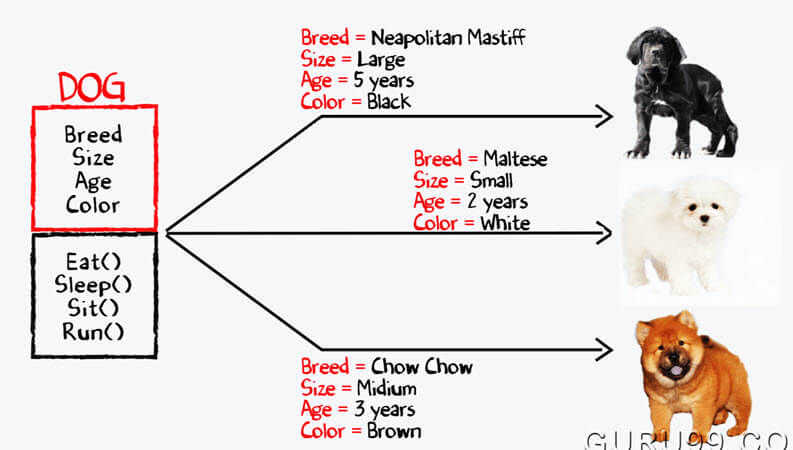

In [2]:
Image(filename='../figures/dogs_as_objects.jpg')

### Intro to [Biopython](https://biopython.org/wiki/Documentation)

* We will download the complete [Arabidopsis](https://www.arabidopsis.org/index.jsp) coding sequences.
* We will read them all in at once.
* We will translate them all into protein sequences.
* We will calcualte their pi values.
* We will do some basic plotting.

#### Let's download sequences from [here](https://www.arabidopsis.org/download/index-auto.jsp?dir=%2Fdownload_files%2FGenes%2FAraport11_genome_release%2FAraport11_blastsets)

In [ ]:
!wget https://www.arabidopsis.org/download_files/Genes/Araport11_genome_release/Araport11_blastsets/Araport11_genes.201606.cds.fasta.gz

In [ ]:
!gunzip Araport11_genes.201606.cds.fasta.gz

In [ ]:
!head Araport11_genes.201606.cds.fasta

#### Let's load a tool set from the Biopython toolkit starting with [SeqIO](https://biopython.org/wiki/SeqRecord)

We will use this to store all CDS sequences into a list and to explore the sequence object abit more.

In [2]:
from Bio import SeqIO

In [3]:
?SeqIO

In [5]:
filename = 'Araport11_genes.201606.cds.fasta'

In [6]:
arabidopsis_cds = []
for seq in SeqIO.parse(filename, 'fasta'):
    arabidopsis_cds.append(seq)

FileNotFoundError: [Errno 2] No such file or directory: 'Araport11_genes.201606.cds.fasta'

In [ ]:
arabidopsis_cds

### Exercise II

* Store the 3 sequence in a variable with the name third_cds

In [ ]:
third_cds = arabidopsis_cds[2]

In [ ]:
third_cds

### ...it's like a sequence dog....

A SeqRecord has several attributes such as

* a sequence -> access with .seq
* an id -> access with .id
* a name -> access with .name
* a description -> access with .description

... and many more as described here [SeqRecord](https://biopython.org/wiki/SeqRecord)

In [ ]:
third_cds

In [ ]:
print(third_cds)

In [ ]:
dir(third_cds)

### Let's access the different 'characteristics' (called attributes) of our SeqRecord

In [ ]:
###the sequence
third_cds.seq

In [ ]:
print(third_cds.seq)

In [ ]:
###the id
third_cds.id

In [ ]:
###the description
third_cds.description

In [ ]:
####reverse complement
third_cds.reverse_complement()

...it's like a sequnce dog...

### Exercise III

* How long is the sequence of the third_cds

In [ ]:
print('The lengths of the third cds is ', len(third_cds.seq), '.', sep='')

### Exercise  IV

* now let's make a length dictionary stores the length of all CDS in a dictionary.
* The keys of the dictionary will be the sequence ids and the vaules the lengths.
* BONUS. Print the name of the longest cds sequence.

In [ ]:
###Faded example
cds_length_dict = {}
for seq in arabidopsis_cds:
    cds_length_dict[seq.id] = len(seq.seq)

In [ ]:
max_length = max(cds_length_dict.values())

In [ ]:
for _id, length in cds_length_dict.items():
    if length == max_length:
        print("This is one of the longest Arabidopsis CDS sequences:", _id)
        print("It is this many bases long:", length)

### Exercise  V

* now let's make a list that stores the length of all CDS in order (sic!).


In [ ]:
###Let's make a cds lenght list as well for later.
###Faded example
cds_length = []
for seq in arabidopsis_cds:
    cds_length.append(len(seq.seq))

### Let's translate all the sequences and store them as protein sequences

We will use the [Seq](https://biopython.org/wiki/Seq) and [SeqRecord](https://biopython.org/wiki/SeqRecord) objects as a container to store these protein sequences.

...it's like a protein sequence dog...

In [ ]:
from Bio import SeqRecord, Seq

In [ ]:
third_cds.seq

Because we know that the third_cds sequence is a DNA sequence we know we can translate it.

In [ ]:
####translate
third_cds.seq.translate()

In [ ]:
###let's make a protein record for the third cds
third_protein = SeqRecord.SeqRecord(seq=third_cds.seq.translate())

In [ ]:
print(third_protein)

In [ ]:
third_protein.id = third_cds.id
third_protein.name = third_cds.name
third_protein.description = third_cds.description

In [ ]:
print(third_protein)

### Exercise IV

Let's make a list of all Arabidopsis protein sequences

In [ ]:
#### Faded example
arabidopsis_proteins = []
protein_length = []

for cds in arabidopsis_cds:
    tmp_protein = SeqRecord.SeqRecord(cds.seq.translate())
    tmp_protein.id = cds.id
    tmp_protein.name = cds.name
    tmp_protein.description = cds.description
    arabidopsis_proteins.append(tmp_protein)
    protein_length.append(len(tmp_protein.seq))

In [ ]:
###Quick checks are good
len(arabidopsis_proteins) == len(arabidopsis_cds)

### Let's see if there is a correlation between 

Some people find python plotting a bit awkward and it is still good to know the basics.

The basic python plotting is [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/). More advanced for interactive figures and such is [Altair](https://altair-viz.github.io/) which is up and coming.

For now some starting plots in matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
?plt.scatter

In [ ]:
plt.scatter(protein_length, cds_length)

In [ ]:
plt.scatter(protein_length, cds_length)
plt.ylabel('CDS Length [bp]')
plt.xlabel('Protein Length [aa]')

In [ ]:
plt.hist(protein_length)

In [ ]:
plt.hist(protein_length, bins=500)

### Let's caclulate the [Isoelectric Point](https://en.wikipedia.org/wiki/Isoelectric_point) for all proteins 

The isoelectric point is the pH at which a peptide sequence has no charge.

We will makes use of the [SeqUtils](https://biopython.org/DIST/docs/api/Bio.SeqUtils-module.html) using a specific dog idea (aka Class) called [IsoelectricPoint](https://biopython.org/DIST/docs/api/Bio.SeqUtils.IsoelectricPoint.IsoelectricPoint-class.html) to make these computations easier.

In [ ]:
from Bio.SeqUtils import IsoelectricPoint as IP

In [ ]:
?IP

In [ ]:
#### third_protein
third_protein.seq

In [ ]:
protein = IP.IsoelectricPoint(third_protein.seq)

...it's like a sequnce dog...

In [ ]:
###calculate the pi
protein.pi()

In [ ]:
####calculate the charge at a certain 
protein.charge_at_pH(10)

### Exercise VII

* Let's make a list of all the pi values of all proteins.
* Plot the pi distribution of all proteins in Arabidopsis.
* Explain the observed distribution

In [ ]:
#### Faded example
protein_pi_values = []
for protein in arabidopsis_proteins:
    tmp_protein = IP.IsoelectricPoint(protein.seq)
    tmp_protein_pi = tmp_protein.pi()
    protein_pi_values.append(tmp_protein_pi)

In [ ]:
#### Plot the distribution of pi values of all arabidopsis proteins
plt.hist(protein_pi_values, bins = 100)
plt.xlabel('pi [pH]')

### Exercise VIII

* look at the relationship between protein length and pI values



In [ ]:
plt.scatter(protein_length, protein_pi_values, alpha=0.2)

The problem here is that too many points are overlapping and we would need to do some summary statistics while plotting.

### Seaborn to the rescue!

Let's do some density plots looking at both [distributions](https://seaborn.pydata.org/tutorial/distributions.html) at once.

In [ ]:
import seaborn as sns

In [ ]:
sns.kdeplot(protein_length, protein_pi_values)

In [ ]:
sns.jointplot(protein_length, protein_pi_values, kind='hex', color = 'g')